# Solution Sets

### Introduction

In linear algebra, a **solution set** is the collection of all possible values for variables that satisfy a system of linear equations. A solution set can represent a **unique solution**, **infinitely many solutions**, or can be empty, meaning **no solutions** exist. Solution sets help understand the relationships between equations and characterize the properties of linear systems. It's called a "set" because it contains all valid solutions for a linear system.


Let's begin with our augmented RREF matrix from the previous section:

$$
\displaystyle \left(\begin{array}{rrr|r}
1 & 0 & 0 & \frac{8}{9} \\
0 & 1 & 0 & \frac{7}{3} \\
0 & 0 & 1 & \frac{14}{9}
\end{array}\right)
$$

<div style="background-color:yellow; padding: 5px 10px 0px 10px; border: 1px solid black;">
Definitions:
    
- **Coefficients**: the columns to the left of the vertical bar
- **Constants**: the column to the right of the vertical bar
- **Pivots**:  a pivot element is a nonzero element that is the first nonzero entry in its row when using the Gaussian elimination method to convert the matrix into row echelon form or reduced row echelon form
  
</div>

<br/>

In the above example, we have a pivot in each **coefficient** column.

SageMath has a method `pivots()` to return the pivot locations for a matrix:

In [1]:
A = Matrix([[1, 0, 0, 8/9],
            [0, 1, 0, 7/3],
            [0, 0, 1, 14/9]])

A.pivots()

(0, 1, 2)

### Determining how many solutions exist

The following RREF's show the three types of solutions that are possible:

<div style="display: flex;">
<div style="flex: 1;">
$$
\left(\begin{array}{rr|r}
1 & 0 & \frac{-2}{7} \\
0 & 1 & \frac{4}{7} \\
\end{array}\right)
$$
Unique Solution
</div>
<div style="margin-left: 20px; flex: 1;">
$$
\left(\begin{array}{rr|r}
1 & \frac{2}{3} & \frac{7}{3} \\
0 & 0 & 0
\end{array}\right)
$$
Infinite Solutions
</div>
<div style="margin-left: 20px; flex: 1;">
$$
\left(\begin{array}{rr|r}
1 & 0 & 2 \\
0 & 1 & 3 \\
0 & 0 & 1 \\
\end{array}\right)
$$
No solutions
</div>
</div>


<div style="background-color:yellow; padding: 5px 10px 0px 10px; border: 1px solid black;">
Definitions:
    
- **Unique Solution**:  a unique solution has a pivot in all **coefficient columns**
- **Infinite Solutions**: infinite solutions have a **row with no pivots**
- **No Solution**: there are no solutions if there is a pivot in the **constant column**

 
- **Consistent System**:  a system of linear equations is considered consistent if it has at least one solution. This means there exists a set of values for the variables that satisfies all equations simultaneously
</div>

Let's elaborate on each of these

### Unique Solution

In [2]:
A = Matrix([[3, -2],[1, 4]])
b = vector([-2,2])

A_aug = A.augment(b, subdivide=True)
show(A_aug)

[ 3 -2|-2]
[ 1  4| 2]

In [3]:
A_rref = A_aug.rref()
show(A_rref)

[   1    0|-2/7]
[   0    1| 4/7]

In [4]:
A_rref.pivots()

(0, 1)

We have a pivot in each coefficient column so this is a unique solution.

Let's verify there is only one solution, using `solve_right()`.

In [5]:
A.solve_right(b) # note we are using the A matrix, not the augmented matrix A_aug

(-2/7, 4/7)

The solution to this linear system is:

- $x = -2/7$
- $y = 4/7$

If we plot the linear system, we can see that the lines meet at exactly one point $x = -2/7, y = 4/7$ and is therefore a unique solution. 

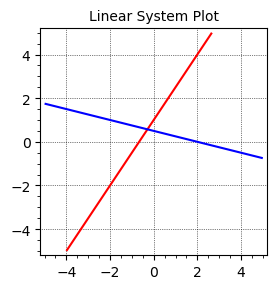

In [6]:
var('x y')

equation1 = 3*x - 2*y == -2
equation2 = x + 4*y == 2

# Create the plots using implicit_plot
plot1 = implicit_plot(equation1, (x, -5, 5), (y, -5, 5), color='red', gridlines='faint')
plot2 = implicit_plot(equation2, (x, -5, 5), (y, -5, 5), color='blue', gridlines='faint')

# Combine plots and show with intersection point
(plot1 + plot2).show(title='Linear System Plot', figsize=4)

### Infinite Solutions

Let's start with this linear system.

$$
3x + 2y = 7 \\
6x + 4y = 14
$$

In this system, if you divide the second equation by 2, you get the first equation. However, the second equation is not a multiple of the first. These equations represent parallel lines with the same slope but different y-intercepts. Since they never intersect, they have infinitely many solutions, meaning any point on one of the lines satisfies both equations.

In [7]:
A = Matrix([[3, 2],[6, 4]])
b = vector([7, 14])

A_aug = A.augment(b, subdivide=True)
show(A_aug)

[ 3  2| 7]
[ 6  4|14]

In [8]:
A_rref = A_aug.rref()
show(A_rref)

[  1 2/3|7/3]
[  0   0|  0]

In [9]:
A_rref.pivots()

(0,)

We can see that there is only one pivot - for the variable `x`.  

Because there is a **row with no pivots** this system has infinite solutions.

In this case `y` is a **free variable** as it doesn't have a pivot.

By swapping terms so that $x$ is dependent on $y$, we can see that: $x == -2/3*y + 7/3$

<div style="background-color:yellow; padding: 5px 10px 0px 10px; border: 1px solid black;">
    
Definition: **Free variable**

In linear algebra, a free variable is a variable that can take on any value independently of other variables in a system of linear equations.

</div>

When you have an equation like $x = -\frac{2}{3}y + \frac{7}{3}$, it represents a linear relationship between the variables $x$ and $y$. In this equation, $x$ is expressed in terms of $y$. 

For any real number you choose for $y$, you can calculate the corresponding value of $x$ using the given relationship. Therefore, **every real number you choose for $y$ will yield a corresponding solution for $x$**, making the solution set infinite and continuous along a line with slope $-\frac{2}{3}$ and y-intercept $\frac{7}{3}$.

Here are two example solutions in this infinite solution set:

**Example 1.**

Let's choose $ y = 0 $. Using the equation $ x = -\frac{2}{3}y + \frac{7}{3} $, we can calculate $ x $:

$x = -\frac{2}{3}(0) + \frac{7}{3} = \frac{7}{3}$
So, when $ y = 0 $, $ x = \frac{7}{3} $. Therefore, one solution is $ (x, y) = \left(\frac{7}{3}, 0\right) $.

**Example 2.**

Now, let's choose $ y = 3 $. Using the same equation:

$x = -\frac{2}{3}(3) + \frac{7}{3} = -2 + \frac{7}{3} = \frac{1}{3}$
So, when $ y = 3 $, $ x = \frac{1}{3} $. Another solution is $ (x, y) = \left(\frac{1}{3}, 3\right) $.

If we plot the linear system, we can see the lines overlap exactly, hence infinite solutions.

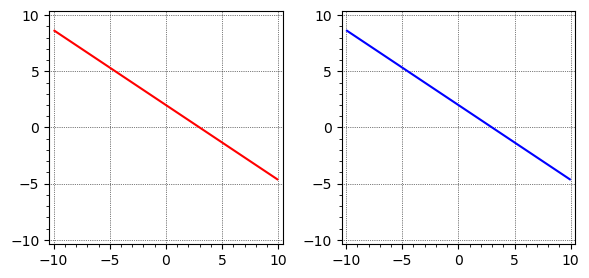

In [10]:
# Define the symbolic variables
x, y = var('x y')

# Define the equations
equation1 = 2*x + 3*y == 6
equation2 = 4*x + 6*y == 12

# Create the plots using implicit_plot
plot1 = implicit_plot(equation1, (x, -10, 10), (y, -10, 10), color='red', gridlines='faint')
plot2 = implicit_plot(equation2, (x, -10, 10), (y, -10, 10), color='blue', gridlines='faint')

# Show plots side by side with equation text
(graphics_array([[plot1, plot2]])).show(figsize=6)

### No Solution

In [11]:
A = Matrix([[3, 2],[6, 4]])
b = vector([7,12])

A_aug = A.augment(b, subdivide=True)
show(A_aug)

[ 3  2| 7]
[ 6  4|12]

In [12]:
A_rref = A_aug.rref()
show(A_rref)

[  1 2/3|  0]
[  0   0|  1]

There is a pivot is in the **constant column** so there is no solution.

We can also use the `pivots()` method to show this.

In [13]:
A_rref.pivots()

(0, 2)

In [14]:
# if there is no solution solve_right raises 'ValueError: matrix equation has no solutions'
try:
    A.solve_right(b) # note we are using the A matrix, not the augmented matrix A_aug
except ValueError:
    print("matrix equation has no solutions")

matrix equation has no solutions


If we plot the linear system, we can see the lines are parallel and will never overlap.

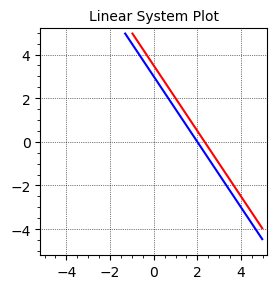

In [15]:
var('x y')

equation1 = 3*x + 2*y == 7
equation2 = 6*x + 4*y == 12

# Create the plots using implicit_plot
plot1 = implicit_plot(equation1, (x, -5, 5), (y, -5, 5), color='red', gridlines='faint')
plot2 = implicit_plot(equation2, (x, -5, 5), (y, -5, 5), color='blue', gridlines='faint')

# Combine plots and show with intersection point
(plot1 + plot2).show(title='Linear System Plot', figsize=4)

### Solution automation

This section shows a utility function for describing solution sets.

In [16]:
def solution_details(augmented_matrix, vars=None):
    try:
        num_coeff_cols = augmented_matrix.subdivisions()[1][0]
        if not num_coeff_cols > 0:
            raise ValueError("Subdivided augmented matrix required.")
    except (AttributeError, IndexError):
        raise ValueError("Subdivided augmented matrix required.")

    pivots = augmented_matrix.pivots()
    const_col = num_coeff_cols + 1

    print("Matrix and RREF:")
    import sys

    u = [augmented_matrix, augmented_matrix.rref()]
    show(augmented_matrix, augmented_matrix.rref())

    print()
    
    # is RHS all zeros
    is_zero = all(component == 0 for component in augmented_matrix[:, -1])
    if is_zero:
        print('Matrix is homogeneous, must be consistent (always at least one soln - the 0 vector).')
    else:
        print('Matrix is not homogeneous - can be inconsistent.')

    if (const_col - 1) in pivots:
        print('No Solution (Inconsistent - const col has pivot)')
    else:
        if len(pivots) == num_coeff_cols:
            print("Unique Solution (Consistent, pivot position in each col)")
        elif len(pivots) < num_coeff_cols:
            print('Infinitely Many Solutions (Consistent, >= 1 coeff col with no pivots)')

    solution, X, X_pivots, X_free, param_sol_dict = my_solve(augmented_matrix, vars)
    
    print("Variables: ", X)
    print("Pivots (leading) variables: ", X_pivots)
    print("Free variables: ", X_free)
    print()

    if solution:
        # flatten solution list
        import operator
        solution = reduce(operator.concat, solution)
        
        print("Solution: ")
        [print(f'  {s}') for s in solution if len(solution)]
        print()

    if param_sol_dict:
        print("Parametized solution vectors")
        print("(particular + unrestricted combination)")
        for key, value in param_sol_dict.items():
            print(f"{key}: {str(value[0]).rjust(10)} {' '.join(str(v).rjust(10) for v in value[1])}")
        print()

def my_solve(augmented_matrix, vars=None):
    A = augmented_matrix[:, :-1]
    Y = augmented_matrix[:, -1]

    m, n = A.dimensions()
    p, q = Y.dimensions()

    if m != p:
        raise RuntimeError("The matrices have different numbers of rows")

    if vars and len(vars) != n:
        raise RuntimeError(f"Provided variables '{vars}' != number of columns '{n}'")

    if vars:
        X = vector([var(vars[i]) for i in range(n)])
    else:
        X = vector([var(f"x_{i}") for i in range(n)])

    X_pivots = vector([var(X[i]) for i in range(n) if i in A.pivots()])
    X_free = vector([var(X[i]) for i in range(n) if i not in A.pivots()])

    sols = []
    param_sol_dict = {}
    for j in range(q):
        system = [A[i] * X == Y[i, j] for i in range(m)]
        sol = solve(system, *X_pivots)

        if len(sol):
            for s in sol[0]:
                coefficients = [s.rhs().coefficient(var) for var in X_free]
                constant_term = s.rhs() - sum(coeff * var for coeff, var in zip(coefficients, X_free))
                
                coeff_var_pairs = [(coeff, var) for coeff, var in zip(coefficients, X_free)]
                coeff_var_strings = [f"{coeff}{var}" for coeff, var in coeff_var_pairs]

                if len(X_free):
                    param_sol_dict[str(s.lhs())] = [constant_term, coeff_var_strings]

            if len(X_free):
                for free_var in X_free:
                    param_sol_dict[str(free_var)] = [0, [f'1{var}' if var == free_var else f'0{var}' for var in X_free]]

            sols += sol

    return sols, X, X_pivots, X_free, param_sol_dict


#### Unique Solution

In [17]:
M = matrix(QQ, 3, [1,2,3,0,1,2,0,0,1])
v = vector(QQ, [4,3,2])
Maug = M.augment(v, subdivide=True)
solution_details(Maug)

Matrix and RREF:


[1 2 3|4]
[0 1 2|3]
[0 0 1|2] [ 1  0  0| 0]
[ 0  1  0|-1]
[ 0  0  1| 2]


Matrix is not homogeneous - can be inconsistent.
Unique Solution (Consistent, pivot position in each col)


Variables: 

 (x_0, x_1, x_2)
Pivots (leading) variables:  (x_0, x_1, x_2)
Free variables:  ()

Solution: 
  x_0 == 0
  x_1 == -1
  x_2 == 2



#### Infinite Solutions

In [18]:
M = matrix(QQ, 3, [2,1,0,-1,0,   0,1,0,1,1,   1,0,-1,2,0])
v = vector(QQ, [4,4,0])
Maug = M.augment(v, subdivide=True)
solution_details(Maug, var('x y z w u'))

Matrix and RREF:


[ 2  1  0 -1  0| 4]
[ 0  1  0  1  1| 4]
[ 1  0 -1  2  0| 0] [   1    0    0   -1 -1/2|   0]
[   0    1    0    1    1|   4]
[   0    0    1   -3 -1/2|   0]


Matrix is not homogeneous - can be inconsistent.
Infinitely Many Solutions (Consistent, >= 1 coeff col with no pivots)
Variables:  (x, y, z, w, u)
Pivots (leading) variables:  (x, y, z)
Free variables:  (w, u)

Solution: 
  x == 1/2*u + w
  y == -u - w + 4
  z == 1/2*u + 3*w

Parametized solution vectors
(particular + unrestricted combination)
x:          0         1w       1/2u
y:          4        -1w        -1u
z:          0         3w       1/2u
w:          0         1w         0u
u:          0         0w         1u



#### No Solution

In [19]:
M = matrix(QQ, 3, [1,2,3,0,1,2,0,0,0])
v = vector(QQ, [4,3,1])
Maug = M.augment(v, subdivide=True)
solution_details(Maug, var('a b c'))

Matrix and RREF:


[1 2 3|4]
[0 1 2|3]
[0 0 0|1] [ 1  0 -1| 0]
[ 0  1  2| 0]
[ 0  0  0| 1]


Matrix is not homogeneous - can be inconsistent.
No Solution (Inconsistent - const col has pivot)
Variables:  (a, b, c)
Pivots (leading) variables:  (a, b)
Free variables:  (c)



### Summary


- Infinitely many solutions are typically associated with underdetermined systems, where there are fewer equations than variables.
- No solutions are usually associated with overdetermined systems, where there are more equations than variables.
